# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [57]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA



# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Dataset: https://www.kaggle.com/datasets/adilshamim8/student-performance-and-learning-style

In [58]:
# Load a dataset in Colab
uploaded = files.upload() # Upload csv file

Saving dataset_inisiasi.csv to dataset_inisiasi (1).csv


In [59]:
df = pd.read_csv('dataset_inisiasi.csv') # Load data

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [60]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  object
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  object
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  object
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech                  10000 non-null  ob

(10000, 15)

In [61]:
# Cek missing value
df.isnull().sum()

,0
Student_ID,0
Age,0
Gender,0
Study_Hours_per_Week,0
Preferred_Learning_Style,0
Online_Courses_Completed,0
Participation_in_Discussions,0
Assignment_Completion_Rate (%),0
Exam_Score (%),0
Attendance_Rate (%),0


In [62]:
# Melihat statistik deskriptif
df.describe()

,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,23.478800,27.130300,10.007900,74.922000,70.188900,75.085100,14.936500,6.979300
std,3.461986,13.002547,6.136726,14.675437,17.649447,14.749251,9.022639,1.996965
min,18.000000,5.000000,0.000000,50.000000,40.000000,50.000000,0.000000,4.000000
25%,20.000000,16.000000,5.000000,62.000000,55.000000,62.000000,7.000000,5.000000
50%,23.000000,27.000000,10.000000,75.000000,70.000000,75.000000,15.000000,7.000000
75%,27.000000,38.000000,15.000000,88.000000,85.000000,88.000000,23.000000,9.000000
max,29.000000,49.000000,20.000000,100.000000,100.000000,100.000000,30.000000,10.000000


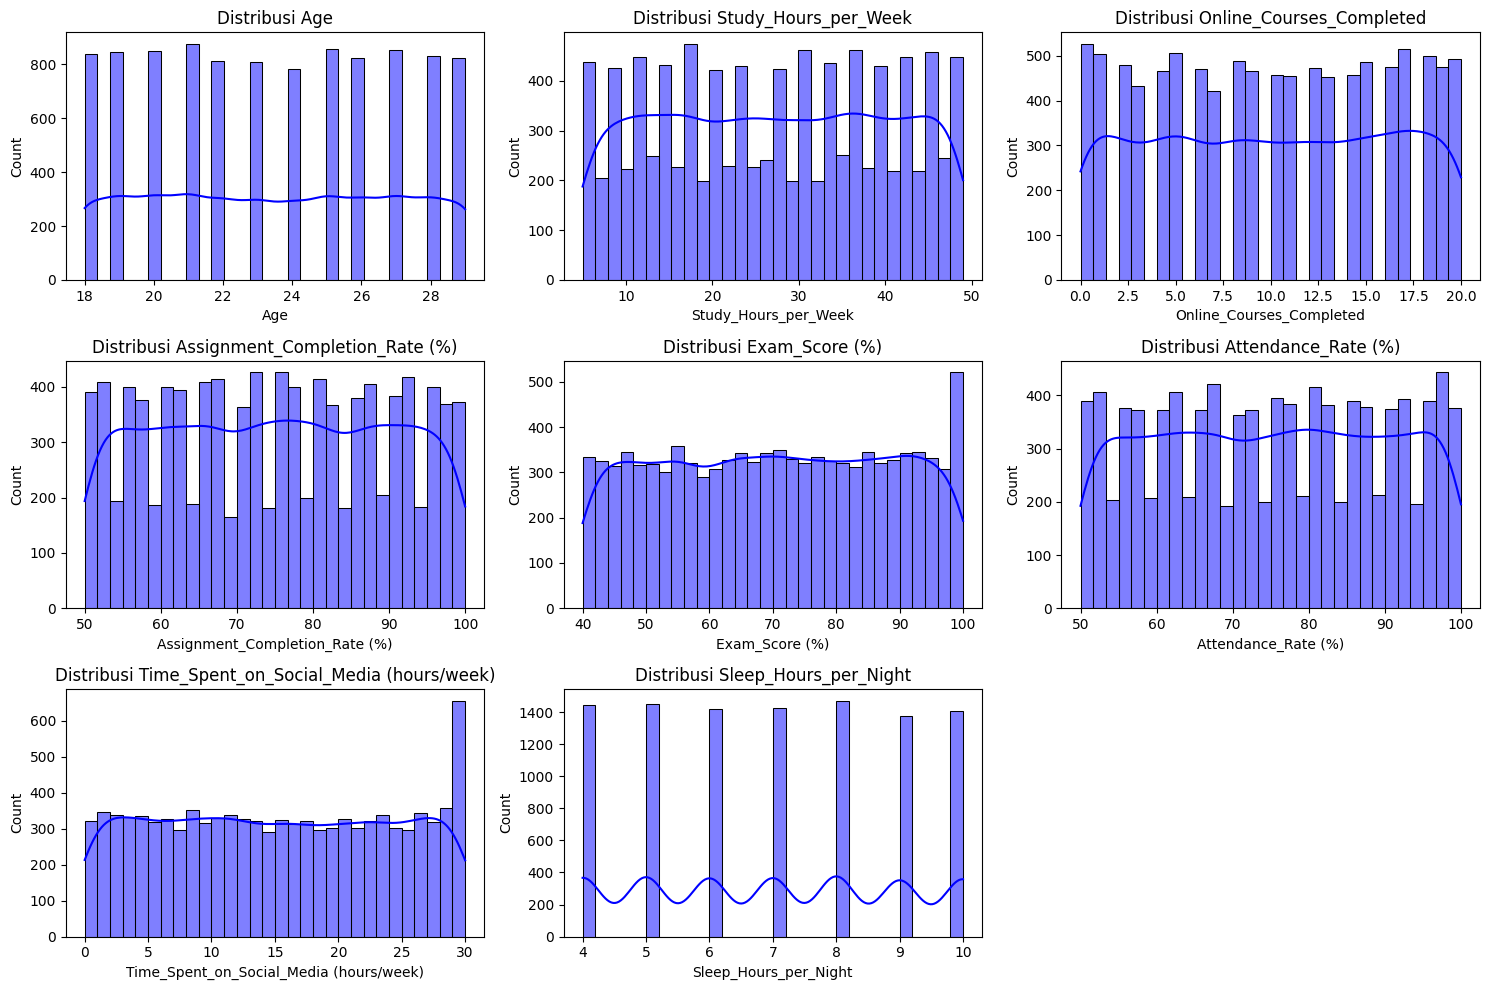

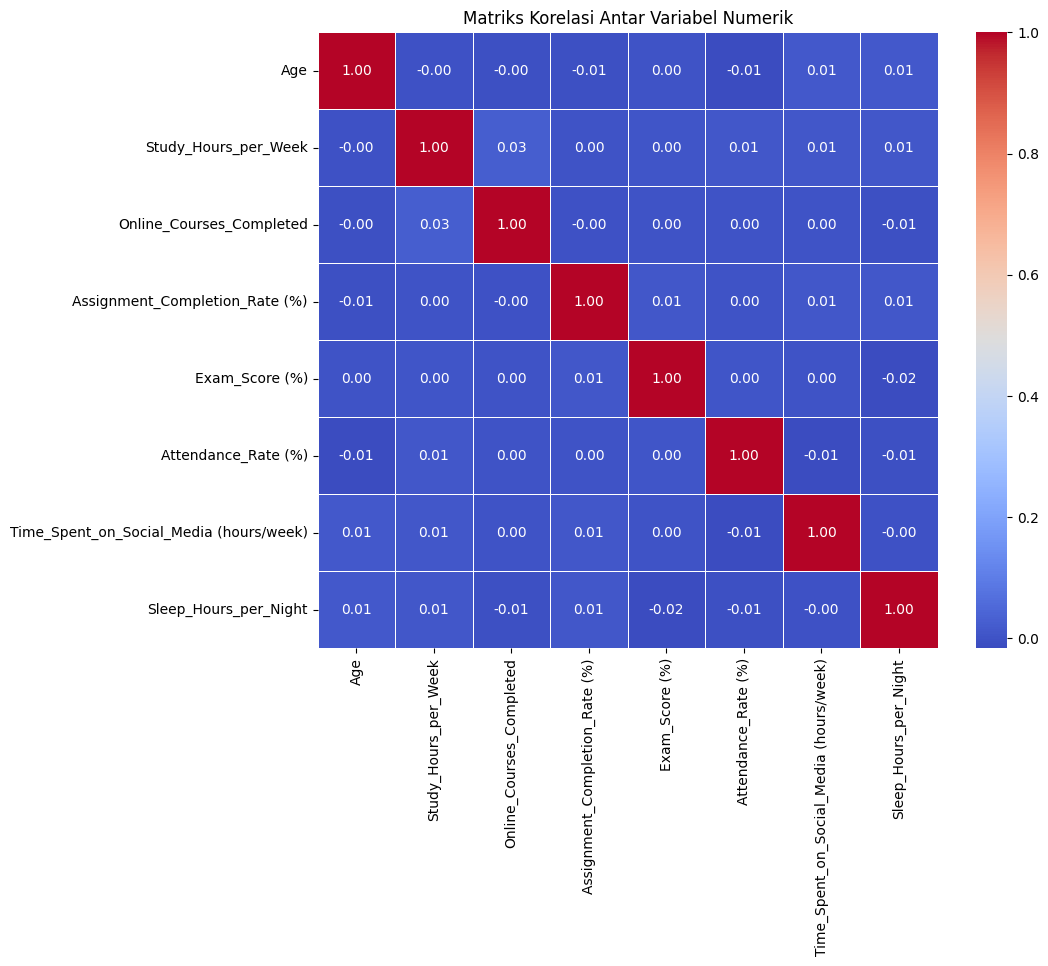

In [63]:
# Menentukan variabel numerik
numeric_cols = [
    "Age", "Study_Hours_per_Week", "Online_Courses_Completed",
    "Assignment_Completion_Rate (%)", "Exam_Score (%)", "Attendance_Rate (%)",
    "Time_Spent_on_Social_Media (hours/week)", "Sleep_Hours_per_Night"
]

# Visualisasi Histogram untuk distribusi data
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color="blue")
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

# Analisis Korelasi (Heatmap)
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Antar Variabel Numerik")
plt.show()

<ipython-input-64-af94f2d0fd53>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")
<ipython-input-64-af94f2d0fd53>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")
<ipython-input-64-af94f2d0fd53>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")
<ipython-input-64-af94f2d0fd53>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effe

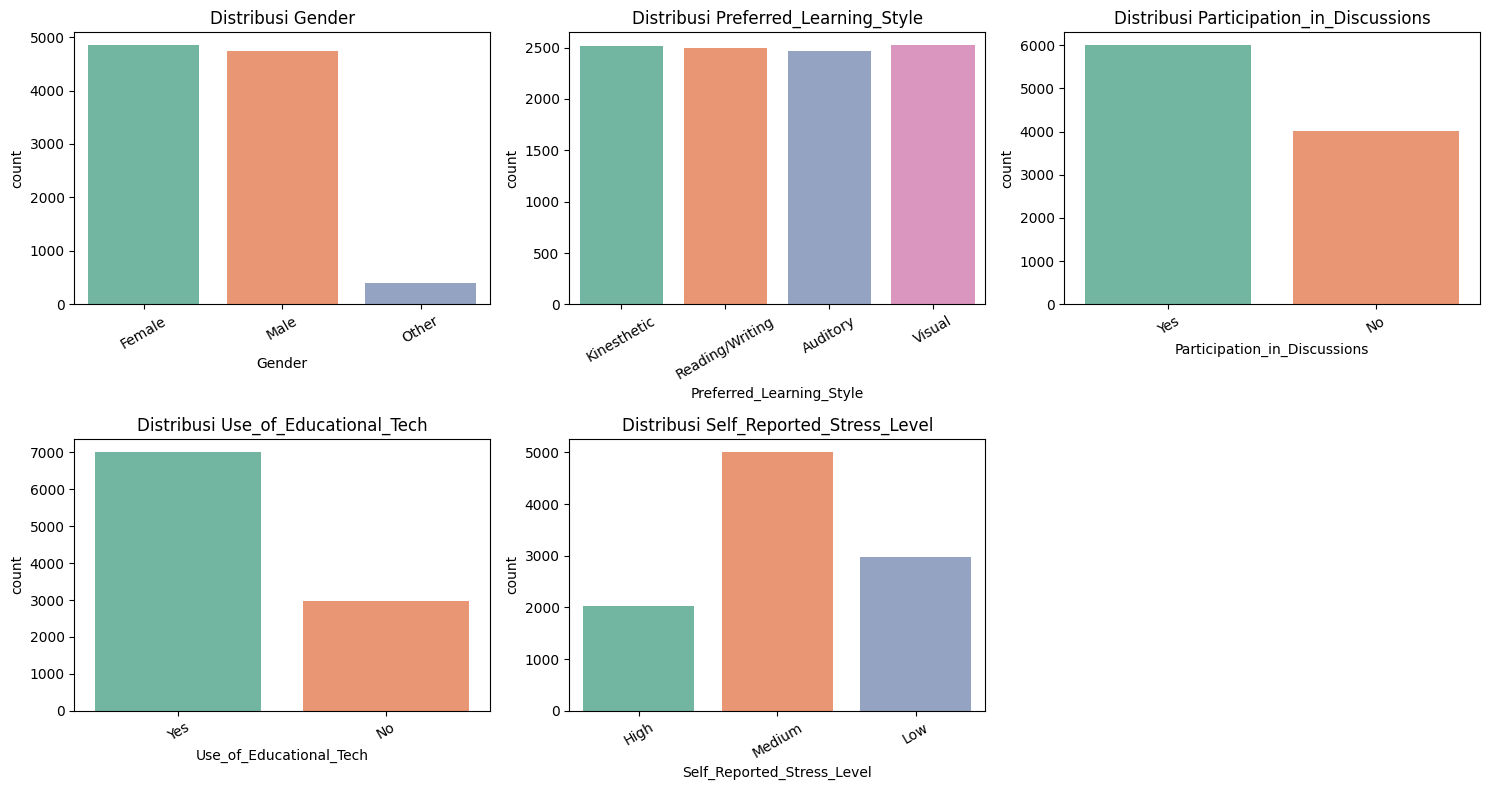

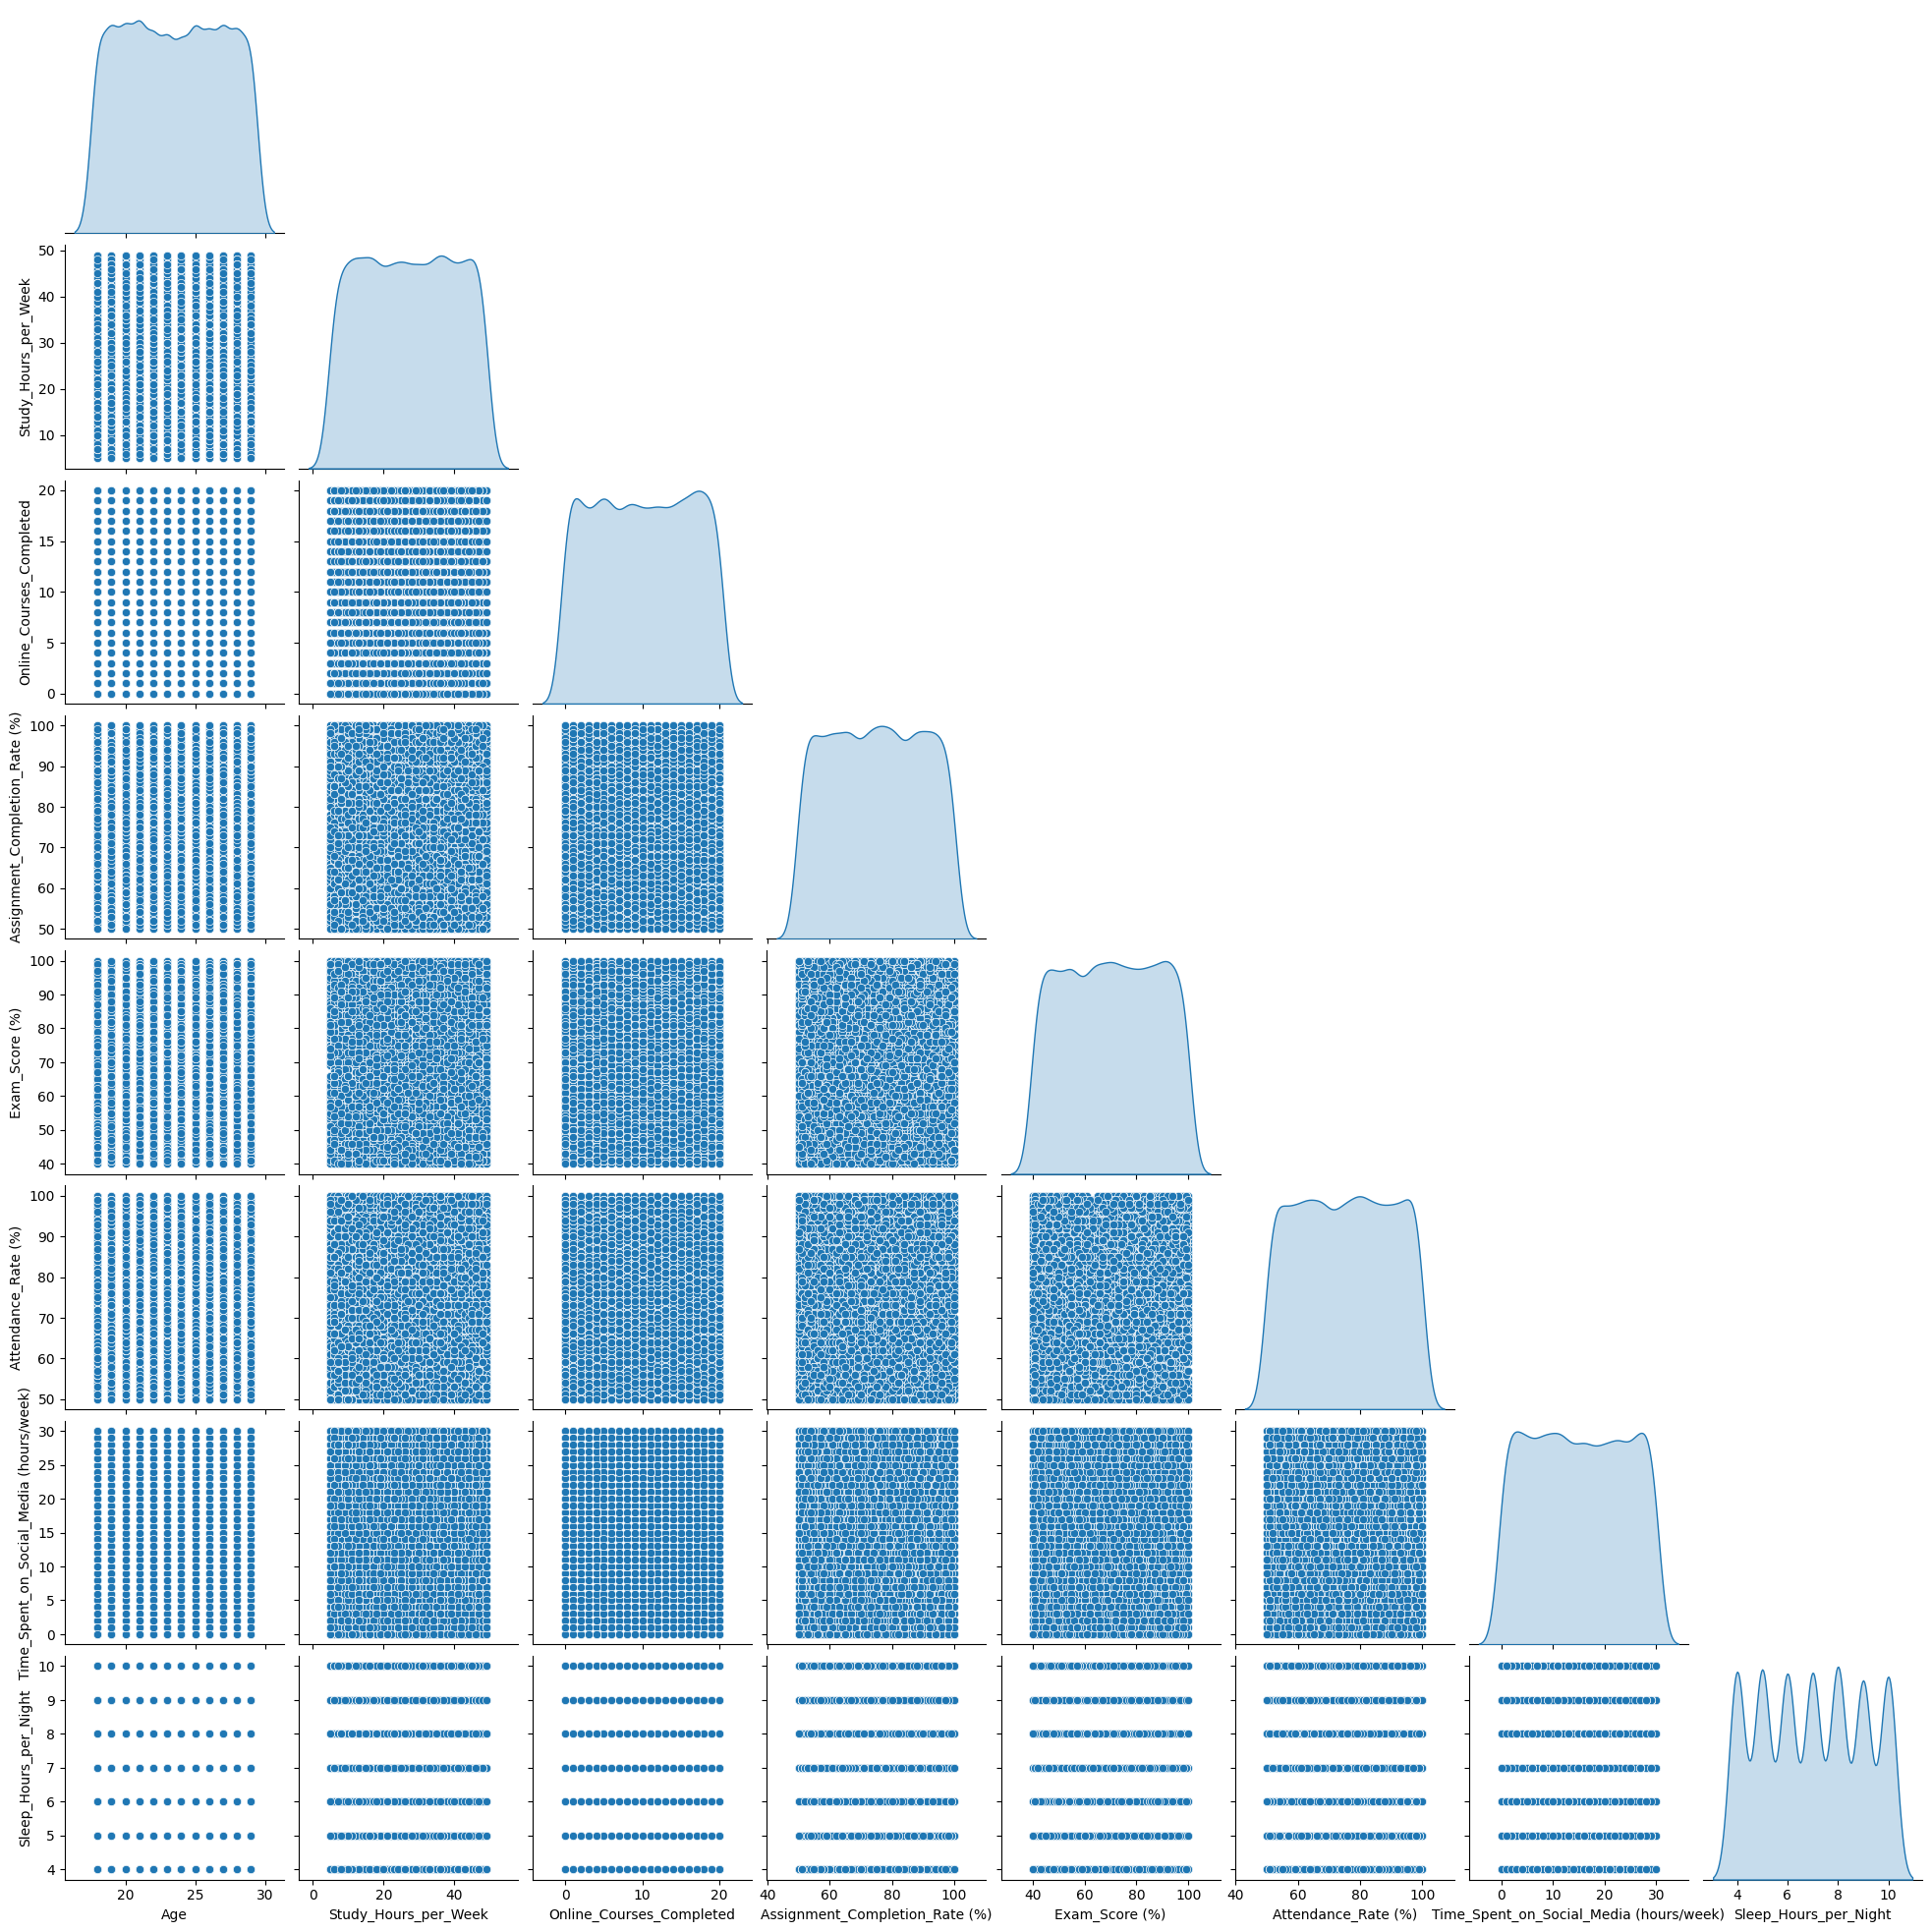

In [64]:
# Menentukan variabel kategorikal dan numerik yang valid
categorical_cols = ["Gender", "Preferred_Learning_Style", "Participation_in_Discussions",
                    "Use_of_Educational_Tech", "Self_Reported_Stress_Level"]

# Konversi kolom numerik ke tipe float untuk menghindari error saat plotting
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Visualisasi distribusi variabel kategorikal dengan diagram batang
plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=df[col], palette="Set2")
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Membuat pairplot untuk melihat hubungan antar variabel numerik
sns.pairplot(df[numeric_cols], diag_kind="kde", corner=True)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [65]:
# Cek duplikasi
df.duplicated().sum()

0

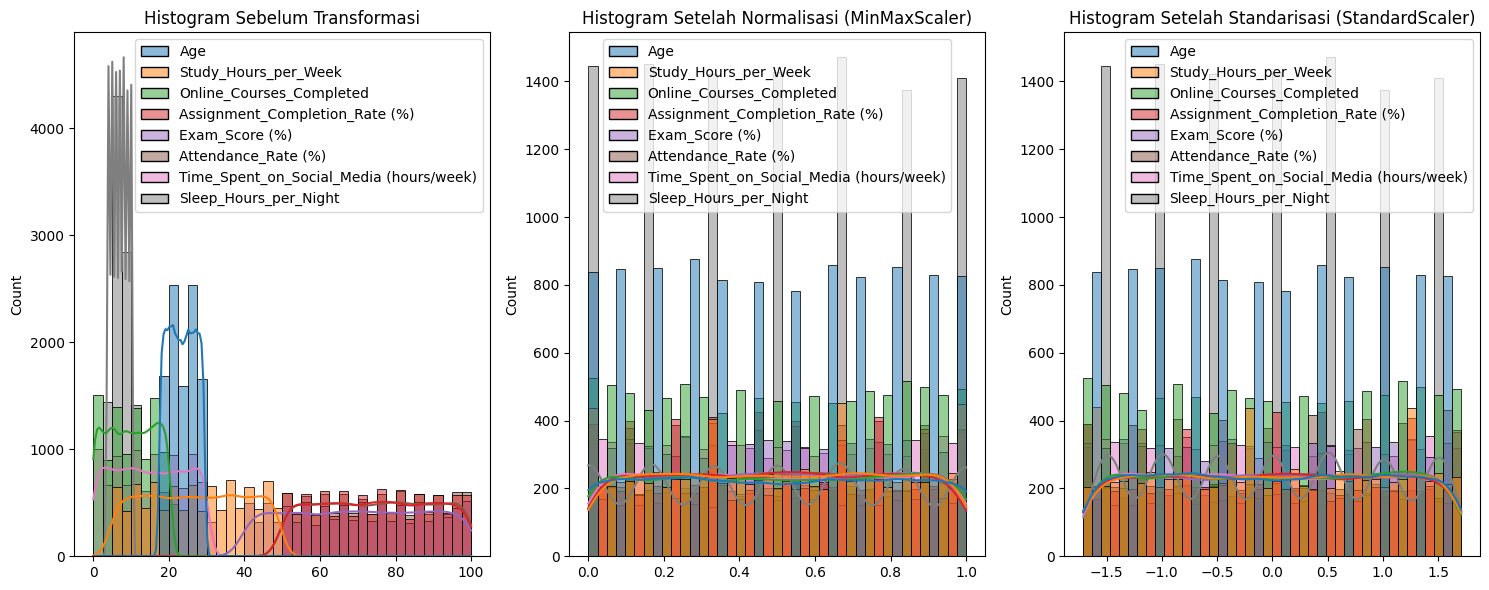

In [66]:
# Simpan data sebelum transformasi
df_before = df[numeric_cols].copy()

# Normalisasi (MinMaxScaler)
scaler_minmax = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numeric_cols] = scaler_minmax.fit_transform(df[numeric_cols])

# Standarisasi (StandardScaler)
scaler_standard = StandardScaler()
df_standardized = df.copy()
df_standardized[numeric_cols] = scaler_standard.fit_transform(df[numeric_cols])

# Visualisasi Histogram Sebelum Transformasi
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.histplot(df_before, kde=True, color="blue")
plt.title("Histogram Sebelum Transformasi")

# Visualisasi Histogram Setelah Normalisasi
plt.subplot(1, 3, 2)
sns.histplot(df_normalized[numeric_cols], kde=True, color="green")
plt.title("Histogram Setelah Normalisasi (MinMaxScaler)")

# Visualisasi Histogram Setelah Standarisasi
plt.subplot(1, 3, 3)
sns.histplot(df_standardized[numeric_cols], kde=True, color="red")
plt.title("Histogram Setelah Standarisasi (StandardScaler)")

plt.tight_layout()
plt.show()

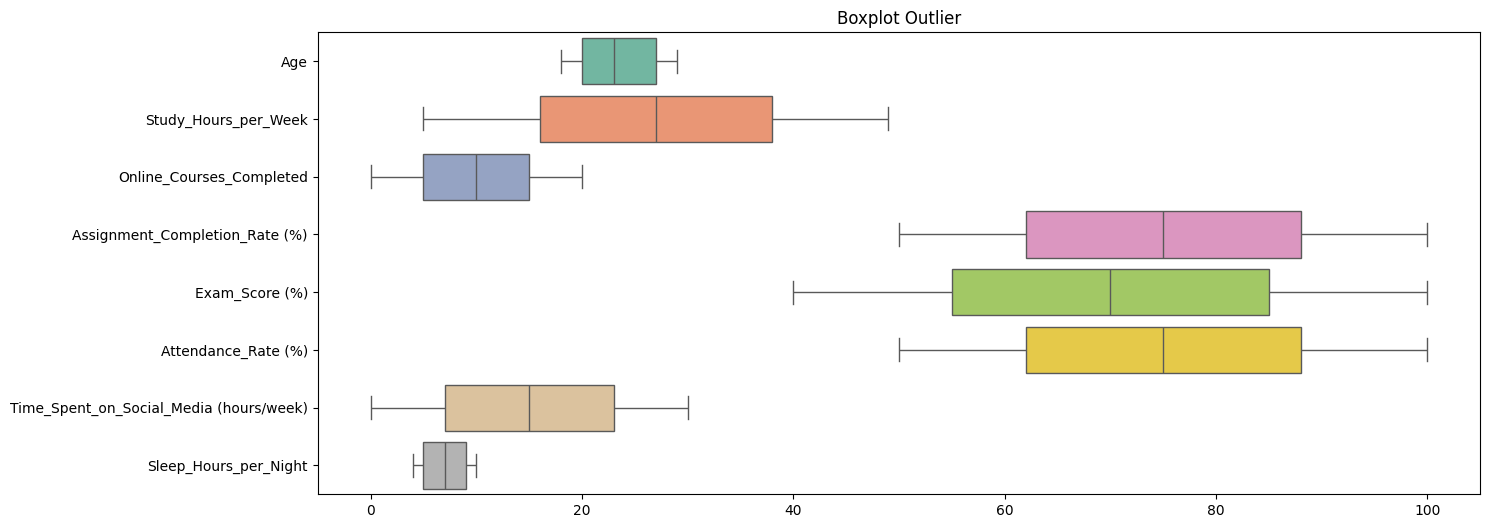

Jumlah outlier per variabel:
 Age                                        0
Study_Hours_per_Week                       0
Online_Courses_Completed                   0
Assignment_Completion_Rate (%)             0
Exam_Score (%)                             0
Attendance_Rate (%)                        0
Time_Spent_on_Social_Media (hours/week)    0
Sleep_Hours_per_Night                      0
dtype: int64


In [67]:
# Visualisasi Outlier dengan Boxplot
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_before, orient="h", palette="Set2")
plt.title("Boxplot Outlier")
plt.show()

# Menggunakan IQR untuk Deteksi Outlier
Q1 = df_before.quantile(0.25)
Q3 = df_before.quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Deteksi outlier
outliers = ((df_before < lower_bound) | (df_before > upper_bound)).sum()

print("Jumlah outlier per variabel:\n", outliers)

In [68]:
# Copy dataset
df_encoded = df.copy()

# Loop untuk Label Encoding
label_enc = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = label_enc.fit_transform(df_encoded[col])

# Cek hasil encoding
print("Dataset setelah encoding:\n", df_encoded.head())
print("Jumlah kolom setelah encoding:", df_encoded.shape[1])


Dataset setelah encoding:
   Student_ID  Age  Gender  Study_Hours_per_Week  Preferred_Learning_Style  \
0     S00001   18       0                    48                         1   
1     S00002   29       0                    30                         2   
2     S00003   20       0                    47                         1   
3     S00004   23       0                    13                         0   
4     S00005   19       0                    24                         0   

   Online_Courses_Completed  Participation_in_Discussions  \
0                        14                             1   
1                        20                             0   
2                        11                             0   
3                         0                             1   
4                        19                             1   

   Assignment_Completion_Rate (%)  Exam_Score (%)  Attendance_Rate (%)  \
0                             100              69                   6

In [69]:
# Copy dataset asli
df_original = df.copy()

# Binning Exam Score (%) menjadi kategori nilai
score_bins = [0, 50, 70, 85, 100]  # Rentang skor ujian
score_labels = ["Rendah", "Sedang", "Baik", "Sangat Baik"]
df_original["Exam_Performance"] = pd.cut(df_original["Exam_Score (%)"], bins=score_bins, labels=score_labels)

# Binning Sleep Hours per Night menjadi kategori pola tidur
sleep_bins = [0, 4, 6, 8, 12]  # Rentang jam tidur
sleep_labels = ["Kurang", "Cukup", "Ideal", "Lebih"]
df_original["Sleep_Category"] = pd.cut(df_original["Sleep_Hours_per_Night"], bins=sleep_bins, labels=sleep_labels)

# Tampilkan hasil
print(df_original[["Exam_Score (%)", "Exam_Performance", "Sleep_Hours_per_Night", "Sleep_Category"]].head())

   Exam_Score (%) Exam_Performance  Sleep_Hours_per_Night Sleep_Category
0              69           Sedang                      8          Ideal
1              40           Rendah                      8          Ideal
2              43           Rendah                      7          Ideal
3              70           Sedang                     10          Lebih
4              63           Sedang                      8          Ideal


In [70]:
df_original

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade,Exam_Performance,Sleep_Category
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C,Sedang,Ideal
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D,Rendah,Ideal
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D,Rendah,Ideal
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B,Sedang,Lebih
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C,Sedang,Ideal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,S09996,20,Male,30,Auditory,6,Yes,62,58,76,Yes,Medium,17,6,C,Sedang,Cukup
9996,S09997,23,Female,16,Visual,8,Yes,54,84,86,Yes,Medium,6,5,B,Baik,Cukup
9997,S09998,26,Male,23,Visual,3,Yes,54,40,70,No,Medium,20,8,D,Rendah,Ideal
9998,S09999,18,Male,41,Reading/Writing,7,Yes,66,45,90,Yes,Low,6,8,D,Rendah,Ideal


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [78]:
X_scaled = scaler_standard.fit_transform(df[numeric_cols])
optimal_k = 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

## **b. Evaluasi Model  Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Silhouette Score untuk 2 cluster: 0.0944
Silhouette Score untuk 3 cluster: 0.0835
Silhouette Score untuk 4 cluster: 0.0846
Silhouette Score untuk 5 cluster: 0.0837
Silhouette Score untuk 6 cluster: 0.0860
Silhouette Score untuk 7 cluster: 0.0872
Silhouette Score untuk 8 cluster: 0.0891
Silhouette Score untuk 9 cluster: 0.0906
Silhouette Score untuk 10 cluster: 0.0904


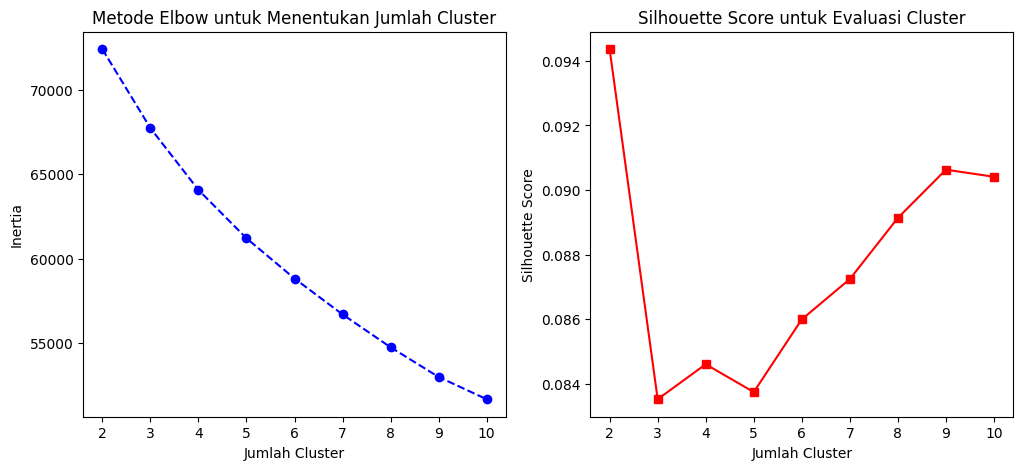

In [72]:
# Evaluasi jumlah cluster menggunakan Elbow Method dan Silhouette Score
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Menampilkan nilai Silhouette Score untuk setiap jumlah cluster
for k, score in zip(cluster_range, silhouette_scores):
    print(f"Silhouette Score untuk {k} cluster: {score:.4f}")

# Visualisasi Elbow Method dan Silhouette Score
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.title("Metode Elbow untuk Menentukan Jumlah Cluster")

plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='s', linestyle='-', color='r')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score untuk Evaluasi Cluster")

plt.show()

In [73]:
silhouette = silhouette_score(X_scaled, df['Cluster'])
print(f'Silhouette Score: {silhouette}')

Silhouette Score: 0.08352400202846272


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

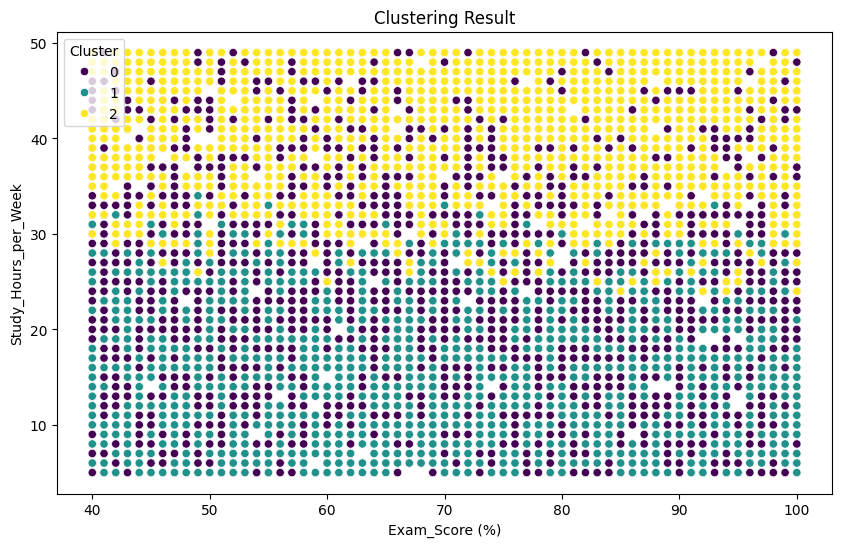

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Exam_Score (%)'], y=df['Study_Hours_per_Week'], hue=df['Cluster'], palette='viridis')
plt.title('Clustering Result')
plt.show()

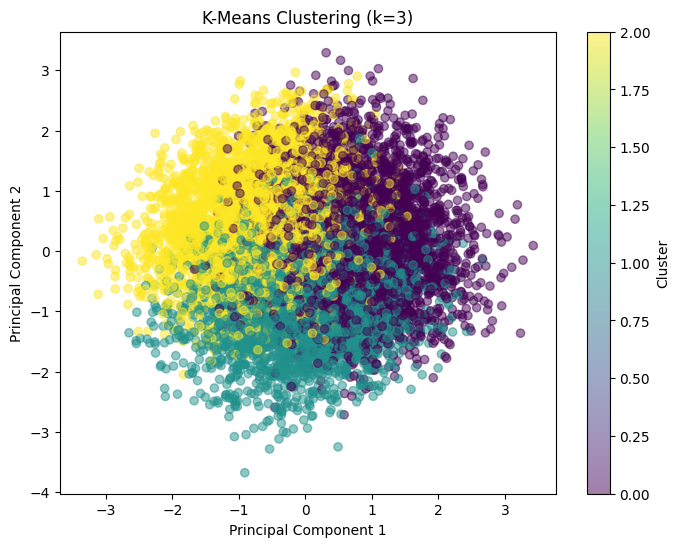

   Age  Study_Hours_per_Week  Exam_Score (%)  Cluster
0   18                    48              69        2
1   29                    30              40        0
2   20                    47              43        2
3   23                    13              70        1
4   19                    24              63        1


In [75]:
# Reduksi dimensi menggunakan PCA untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df["Cluster"], cmap="viridis", alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"K-Means Clustering (k={optimal_k})")
plt.colorbar(label="Cluster")
plt.show()

# Menampilkan beberapa sampel hasil clustering
print(df[["Age", "Study_Hours_per_Week", "Exam_Score (%)", "Cluster"]].head())

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [79]:
df_normalized['Cluster'] = kmeans.labels_
df_original['Cluster'] = df_normalized['Cluster']

In [80]:
df_original.head()

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade,Exam_Performance,Sleep_Category,Cluster
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C,Sedang,Ideal,2
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D,Rendah,Ideal,0
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D,Rendah,Ideal,2
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B,Sedang,Lebih,1
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C,Sedang,Ideal,1


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [81]:
df_normalized[numeric_cols] = scaler_standard.inverse_transform(df_normalized[numeric_cols])

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?


Ringkasan Karakteristik Tiap Cluster
  Cluster        Age                          Study_Hours_per_Week         \
                mean median       std min max                 mean median   
0       0  27.092680   27.0  1.513685  23  29            24.809630   24.0   
1       1  20.843021   21.0  2.056924  18  26            15.996388   15.0   
2       2  22.003867   22.0  2.635156  18  29            39.694527   40.0   

                  ... Time_Spent_on_Social_Media (hours/week)         \
         std min  ...                                    mean median   
0  11.402802   5  ...                               15.607292   16.0   
1   7.218046   5  ...                               14.600657   14.0   
2   6.391690  21  ...                               14.523795   14.0   

                    Sleep_Hours_per_Night                           
        std min max                  mean median       std min max  
0  9.002983   0  30              7.098525    7.0  1.984988   4  10  
1  9.046

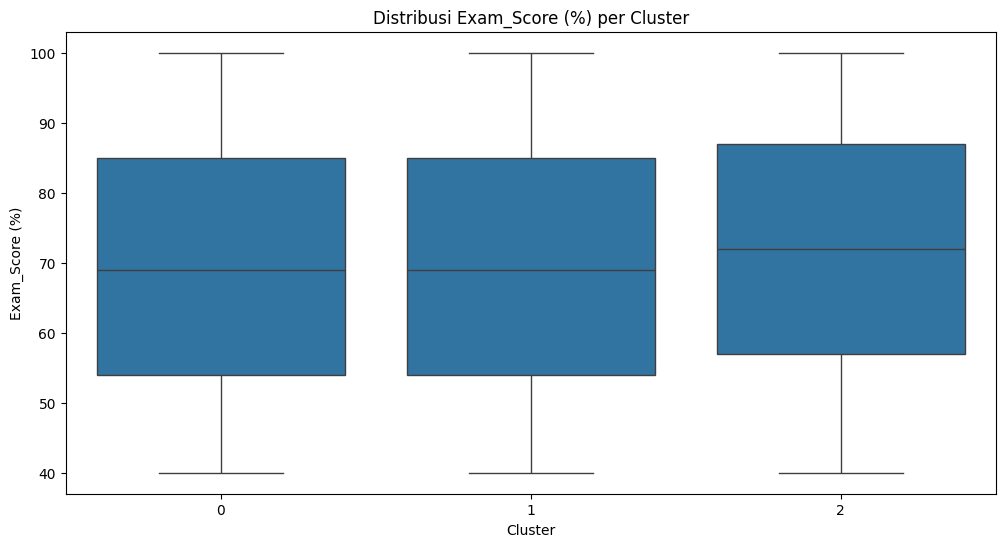

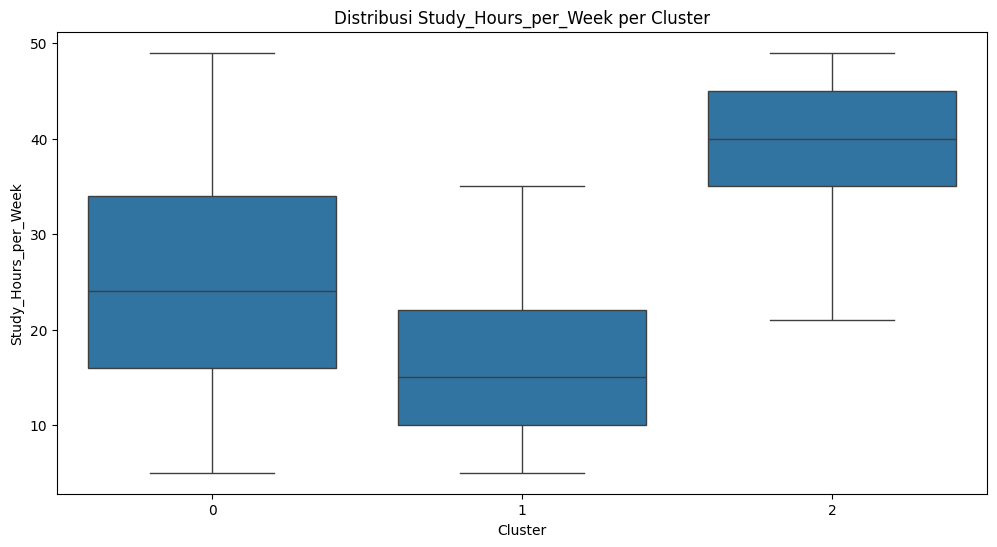

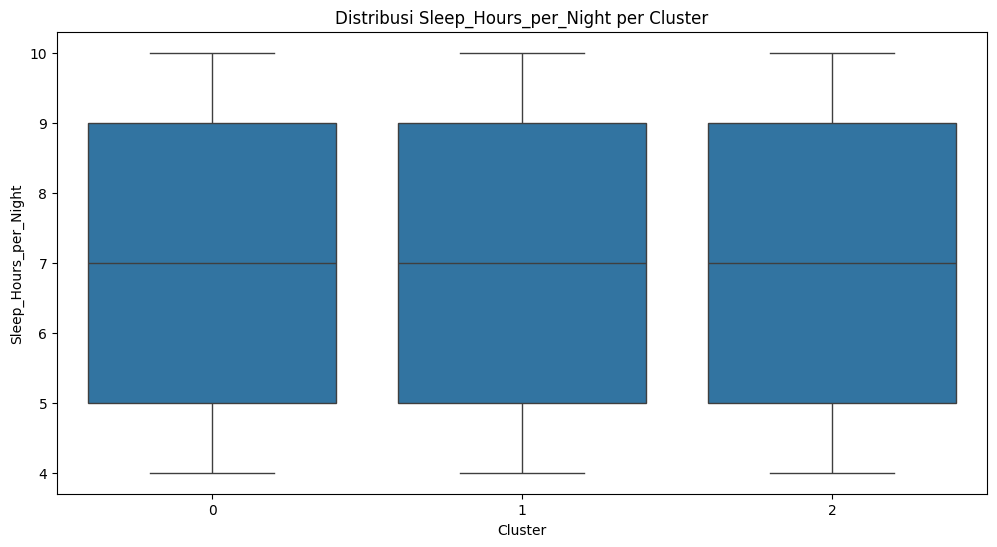

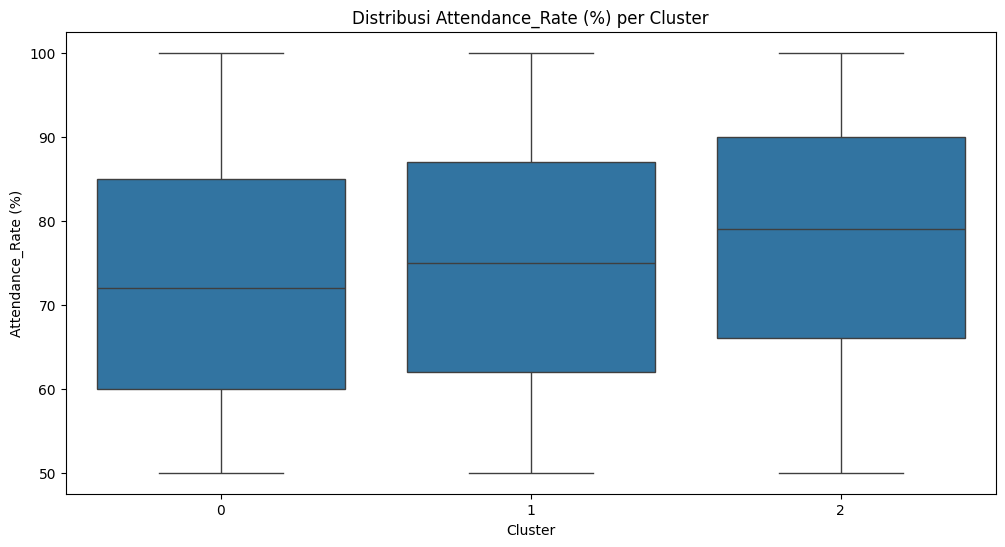

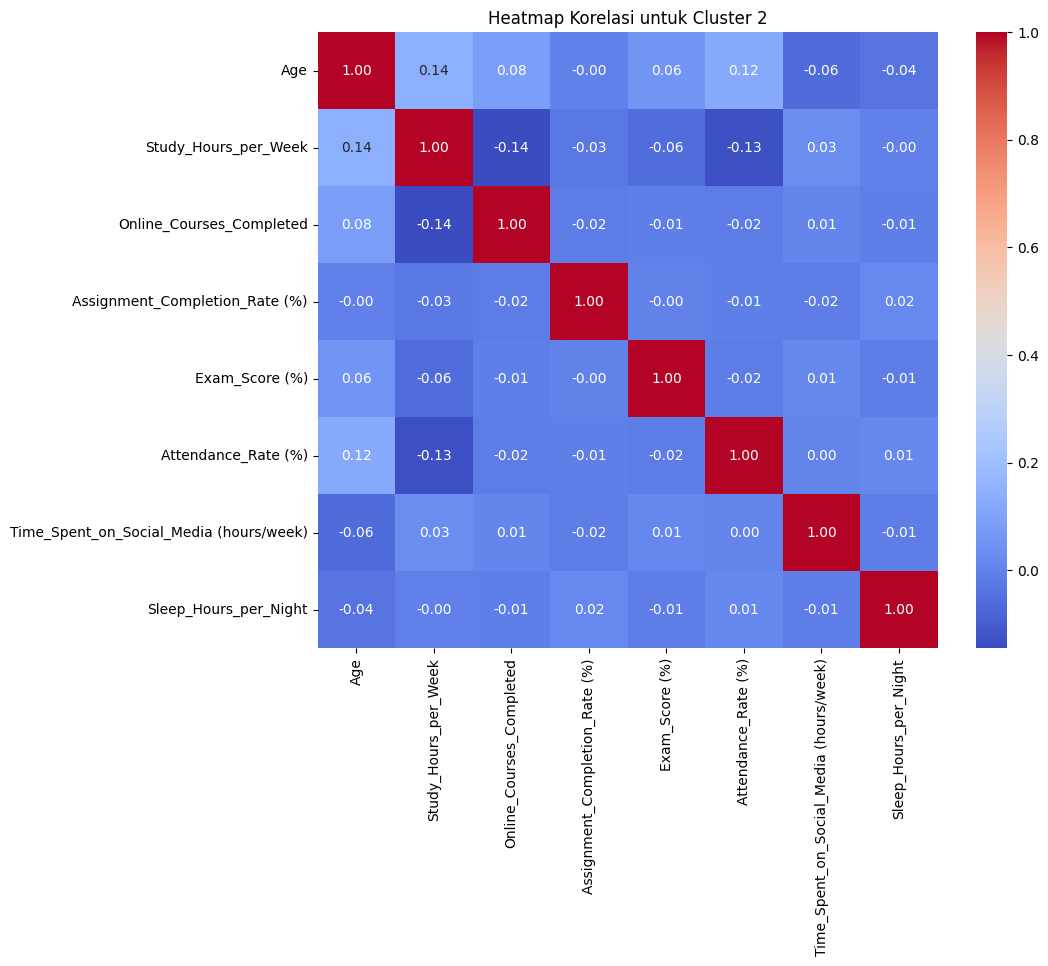

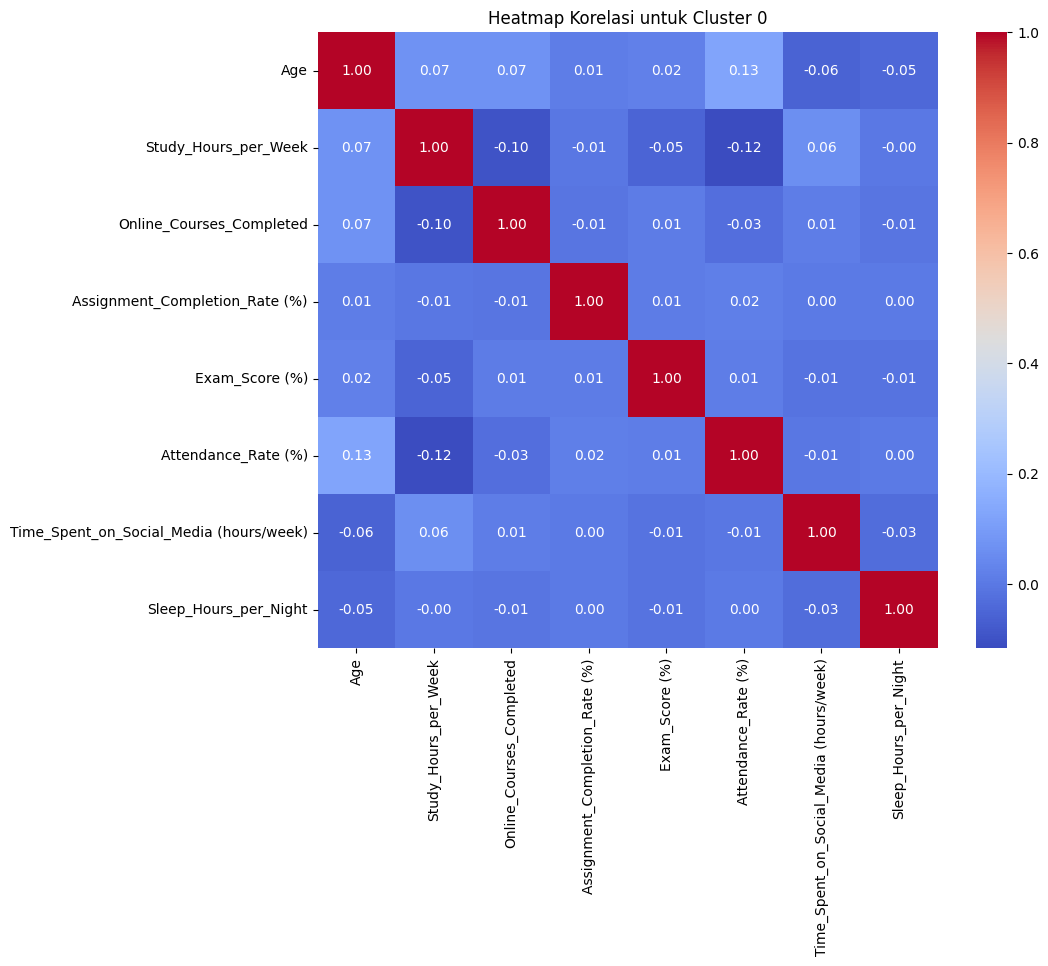

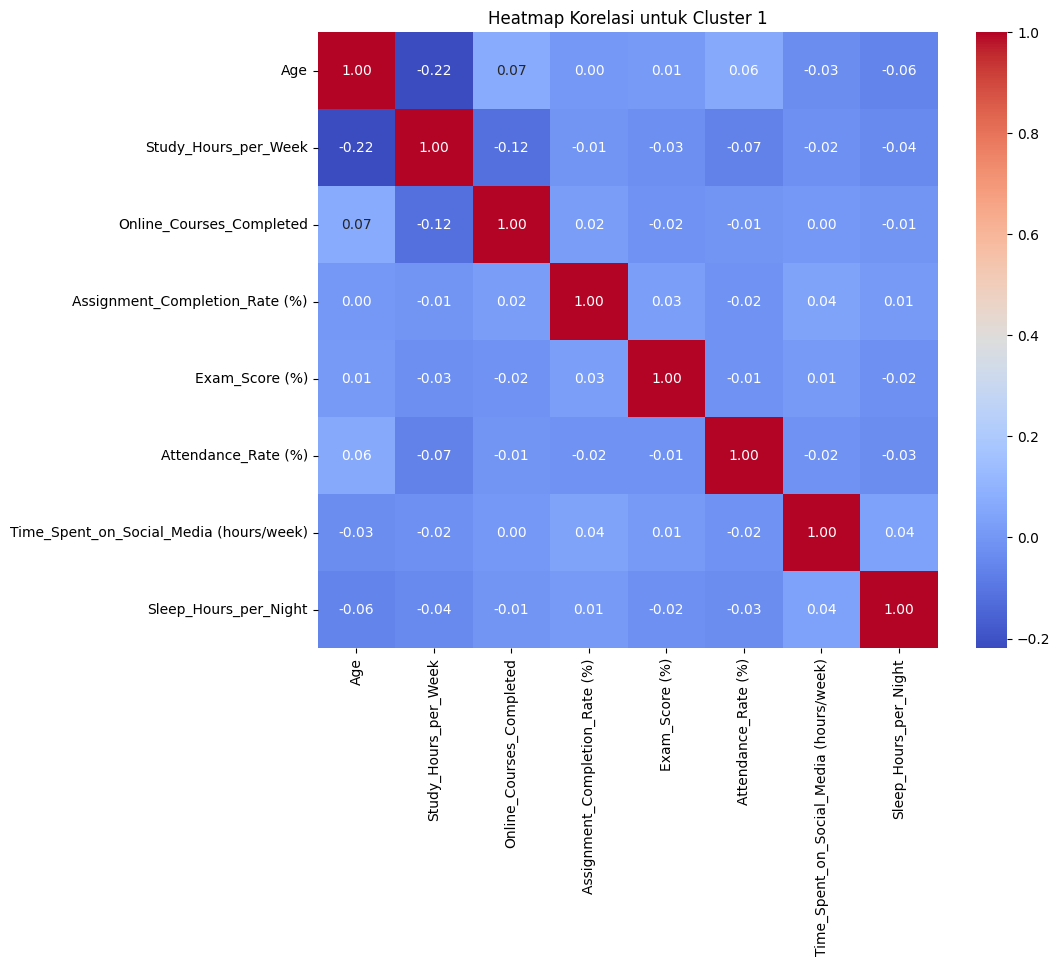


Cluster 2
Rata-rata Age: 22.00
Rata-rata Study_Hours_per_Week: 39.69
Rata-rata Exam_Score (%): 71.46
Rata-rata Attendance_Rate (%): 77.81
Rata-rata Sleep_Hours_per_Night: 6.99
Rata-rata Time_Spent_on_Social_Media (hours/week): 14.52

Distribusi Exam Performance Category:
Exam_Performance_Category
Sedang         31.528852
Sangat Baik    29.268293
Baik           25.104105
Rendah         14.098751
Name: proportion, dtype: float64

Distribusi Sleep Category:
Sleep_Category
Lebih    42.742415
Ideal    28.792385
Cukup    28.465199
Name: proportion, dtype: float64

Cluster 0
Rata-rata Age: 27.09
Rata-rata Study_Hours_per_Week: 24.81
Rata-rata Exam_Score (%): 69.47
Rata-rata Attendance_Rate (%): 72.89
Rata-rata Sleep_Hours_per_Night: 7.10
Rata-rata Time_Spent_on_Social_Media (hours/week): 15.61

Distribusi Exam Performance Category:
Exam_Performance_Category
Sedang         32.980796
Sangat Baik    25.382689
Baik           24.297245
Rendah         17.339271
Name: proportion, dtype: float64

Di

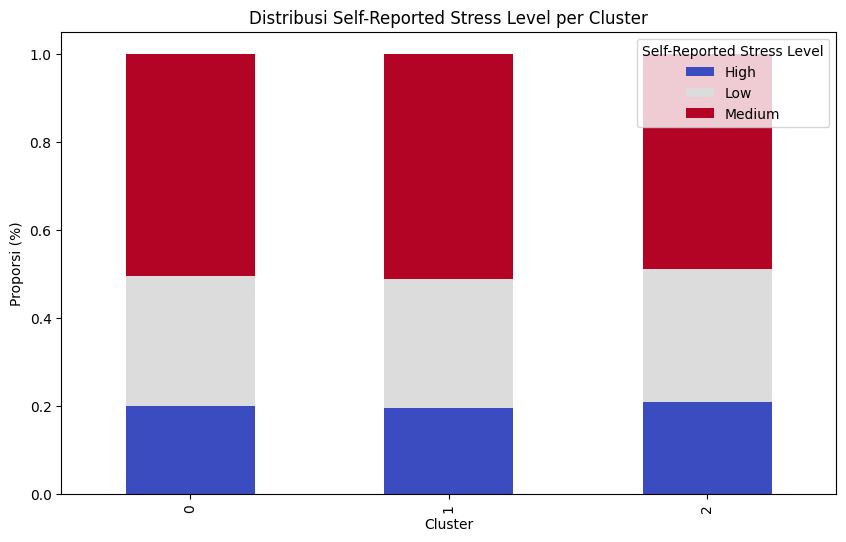


Distribusi Self-Reported Stress Level per Cluster:
Self_Reported_Stress_Level       High        Low     Medium
Cluster                                                    
0                           20.011133  29.446145  50.542722
1                           19.573071  29.261084  51.165846
2                           20.939917  30.249851  48.810232


In [83]:
#Hitung Statistik Deskriptif Tiap Cluster
cluster_summary = df_original.groupby("Cluster")[numeric_cols].agg(["mean", "median", "std", "min", "max"]).reset_index()
print("\nRingkasan Karakteristik Tiap Cluster")
print(cluster_summary)

# Visualisasi Distribusi Fitur dalam Tiap Cluster
features = ["Exam_Score (%)", "Study_Hours_per_Week", "Sleep_Hours_per_Night", "Attendance_Rate (%)"]
for feature in features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Cluster", y=feature, data=df_original)
    plt.title(f"Distribusi {feature} per Cluster")
    plt.show()

# Heatmap Korelasi Tiap Cluster
for cluster in df_original["Cluster"].unique():
    plt.figure(figsize=(10, 8))
    cluster_data = df_original[df_original["Cluster"] == cluster]
    sns.heatmap(cluster_data[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Heatmap Korelasi untuk Cluster {cluster}")
    plt.show()

# Kategori Exam Performance
def categorize_exam(score):
    if score >= 85:
        return "Sangat Baik"
    elif score >= 70:
        return "Baik"
    elif score >= 50:
        return "Sedang"
    else:
        return "Rendah"

df_original["Exam_Performance_Category"] = df_original["Exam_Score (%)"].apply(categorize_exam)

# Kategori Sleep

def categorize_sleep(hours):
    if hours >= 8:
        return "Lebih"
    elif hours >= 6:
        return "Ideal"
    elif hours >= 4:
        return "Cukup"
    else:
        return "Kurang"

df_original["Sleep_Category"] = df_original["Sleep_Hours_per_Night"].apply(categorize_sleep)

# Analisis & Interpretasi Tiap Cluster
for cluster in df_original["Cluster"].unique():
    print(f"\nCluster {cluster}")
    cluster_data = df_original[df_original["Cluster"] == cluster]
    for feature in ["Age", "Study_Hours_per_Week", "Exam_Score (%)", "Attendance_Rate (%)", "Sleep_Hours_per_Night", "Time_Spent_on_Social_Media (hours/week)"]:
        print(f"Rata-rata {feature}: {cluster_data[feature].mean():.2f}")

    # Distribusi kategori Exam Performance & Sleep
    exam_dist = cluster_data["Exam_Performance_Category"].value_counts(normalize=True) * 100
    sleep_dist = cluster_data["Sleep_Category"].value_counts(normalize=True) * 100
    print("\nDistribusi Exam Performance Category:")
    print(exam_dist)
    print("\nDistribusi Sleep Category:")
    print(sleep_dist)

# Hitung distribusi Self-Reported Stress Level Tiap Cluster
if "Self_Reported_Stress_Level" in df_original.columns:
    stress_distribution = df_original.groupby("Cluster")["Self_Reported_Stress_Level"].value_counts(normalize=True).unstack()

    # Visualisasi Distribusi Self-Reported Stress Level dalam Tiap Cluster
    stress_distribution.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="coolwarm")
    plt.title("Distribusi Self-Reported Stress Level per Cluster")
    plt.xlabel("Cluster")
    plt.ylabel("Proporsi (%)")
    plt.legend(title="Self-Reported Stress Level")
    plt.show()
    print("\nDistribusi Self-Reported Stress Level per Cluster:")
    print(stress_distribution * 100)

# Interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
**1. Ringkasan Karakteristik:**
- Rata-rata Usia: 27 tahun
- Rata-rata Waktu Belajar per Minggu: 24.81 jam
- Rata-rata Skor Ujian: 69.47%, dengan performance category sedang (32.98%), sangat baik (24.38%),baik (24.3%), rendah (17.34%)
- Rata-rata Tingkat Kehadiran: 72.89%
- Rata-rata Jam Tidur per Malam: 7.10 jam dengan sleep category tidur berlebih (45.12%), ideal (28.44%), cukup (26.44%)
- Rata-rata Waktu di Media Sosial: 15.61 jam/minggu
- Self Reported Stress Level: medium (50.54%), low (29.45%). high (20.01%)

**2. Interpretasi:**

Mahasiswa dalam Cluster ini cenderung berumur lebih tua dengan waktu belajar yang lebih sedikit dan penggunaan media sosial yang lebih tinggi dibanding cluster lainnya. Tingkat kehadiran mereka juga paling rendah, yang mungkin berdampak pada nilai ujian mereka yang cenderung sedang hingga rendah.

Mayoritas dari mereka memiliki jam tidur yang lebih banyak, yang bisa menjadi indikasi gaya hidup yang lebih santai atau jadwal yang lebih fleksibel. Tingkat stres mereka sedang, tetapi memiliki persentase stres tinggi yang lebih rendah dibanding Cluster 2.

## Cluster 1:
**1. Ringkasan Karakteristik:**
- Rata-rata Usia: 21 tahun
- Rata-rata Waktu Belajar per Minggu: 16 jam
- Rata-rata Skor Ujian: 69.63%, dengan performance category sedang (32.41%), sangat baik (25.68%),baik (24.24%), rendah (17.67%)
- Rata-rata Tingkat Kehadiran: 74.67%
- Rata-rata Jam Tidur per Malam: 6.82 jam dengan sleep category tidur berlebih (39.31%), cukup (32.45%%), ideal (28.24%)
- Rata-rata Waktu di Media Sosial: 14.60 jam/minggu
- Self Reported Stress Level: medium (51.17%), low (29.26%). high (19.57%)

**2. Interpretasi:**

Mahasiswa dalam Cluster 1 merupakan kelompok usia termuda dengan waktu belajar paling sedikit dibandingkan cluster lainnya. Namun, tingkat kehadiran mereka cukup baik, sehingga mereka mungkin lebih mengandalkan materi dari kelas daripada belajar mandiri.

Dari segi hasil ujian, mereka memiliki distribusi yang mirip dengan Cluster 0, tetapi dengan proporsi nilai rendah yang sedikit lebih tinggi. Waktu tidur mereka lebih pendek, tetapi tidak jauh dari ideal.

Tingkat stres mereka paling seimbang, dengan mayoritas berada di kategori Medium, menunjukkan bahwa mereka relatif tidak terlalu terbebani oleh akademik.

## Cluster 2:
**1. Ringkasan Karakteristik:**
- Rata-rata Usia: 22 tahun
- Rata-rata Waktu Belajar per Minggu: 39.69 jam
- Rata-rata Skor Ujian: 71.46%, dengan performance category sedang (31.53%), sangat baik (29.27%),baik (25.1%), rendah (14.1%)
- Rata-rata Tingkat Kehadiran: 77.81%
- Rata-rata Jam Tidur per Malam: 6.99 jam dengan sleep category tidur berlebih (42.74%), ideal (28.79%%), cukup (28.47%)
- Rata-rata Waktu di Media Sosial: 14.52 jam/minggu
- Self Reported Stress Level: medium (48.81%), low (30.25%). high (20.94%)

**2. Interpretasi:**

Mahasiswa dalam Cluster 2 adalah kelompok yang paling rajin belajar, dengan waktu belajar tertinggi dan tingkat kehadiran tertinggi dibandingkan cluster lain.

Dari segi performa akademik, mereka memiliki persentase tertinggi dalam kategori “Sangat Baik”, yang menunjukkan efektivitas belajar yang lebih tinggi. Mereka juga memiliki persentase terendah dalam kategori “Rendah”, yang mengindikasikan bahwa sebagian besar dari mereka memiliki performa akademik yang cukup baik.

Namun, mereka juga mengalami tingkat stres tertinggi dibandingkan cluster lainnya, yang mungkin merupakan konsekuensi dari tekanan akademik yang lebih besar. Meskipun demikian, mayoritas masih berada dalam kategori Medium atau Low, yang menunjukkan bahwa sebagian besar dari mereka masih dapat mengelola stres dengan baik.

Dari segi tidur, mereka memiliki pola tidur yang cukup baik, dengan sebagian besar tidur lebih dari cukup atau ideal. Penggunaan media sosial mereka cukup tinggi, tetapi tidak berlebihan dibandingkan cluster lain.

**Dari analisis ini, dapat disimpulkan bahwa waktu belajar yang lebih tinggi dapat meningkatkan performa akademik, tetapi juga dapat meningkatkan tingkat stres.**

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df_clustered.to_csv('data_clustering.csv', index=False)  # Save DataFrame to CSV

files.download('data_clustering.csv')  # Download the file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>